In [40]:
import warnings
warnings.filterwarnings('ignore')

import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_gen = ImageDataGenerator(rescale=1./255,validation_split=0.3)

train_dataset = data_gen.flow_from_directory(
    'images/',
    target_size=(200, 200),
    batch_size=10,
    class_mode='categorical',
    shuffle=True,
    subset='training') 

valid_dataset = data_gen.flow_from_directory(
    'images/',
    target_size=(200, 200),
    batch_size=10,
    class_mode='categorical',
    shuffle=True,
    subset='validation') 

Found 106 images belonging to 3 classes.
Found 44 images belonging to 3 classes.


In [3]:
train_dataset.class_indices

{'downtrend': 0, 'sideways': 1, 'uptrend': 2}

In [34]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16,(5,5), activation='relu', input_shape=(200,200,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(32,(5,5), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(64,(5,5), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Flatten(),
        #
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(.2),
        #
        tf.keras.layers.Dense(3,activation='softmax')
    ]
)

In [35]:
model.compile(loss='categorical_crossentropy', optimizer= RMSprop(learning_rate=.001),metrics=['accuracy'])

In [36]:
model_fit = model.fit(train_dataset,steps_per_epoch=3,epochs=100)

Epoch 1/100
3/3 [==============================] - 3s 456ms/step - loss: 39.9904 - accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 1s 518ms/step - loss: 1.1943 - accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 1s 398ms/step - loss: 0.4860 - accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 1s 338ms/step - loss: 0.2107 - accuracy: 0.9667
Epoch 5/100
3/3 [==============================] - 1s 335ms/step - loss: 0.3609 - accuracy: 0.8000
Epoch 6/100
3/3 [==============================] - 1s 308ms/step - loss: 0.1265 - accuracy: 0.9667
Epoch 7/100
3/3 [==============================] - 1s 334ms/step - loss: 0.3256 - accuracy: 0.9333
Epoch 8/100
3/3 [==============================] - 1s 310ms/step - loss: 0.0454 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 1s 331ms/step - loss: 0.0372 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 1s 344ms/step - loss: 0.0759 - accuracy: 0.9615
Epoch 11

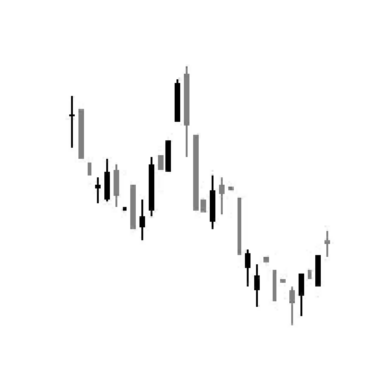

1/1 [==============================] - 0s 34ms/step
Downtrend


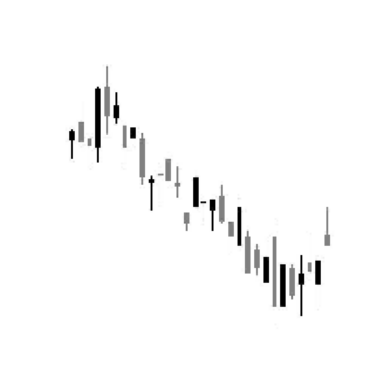

1/1 [==============================] - 0s 36ms/step
Downtrend


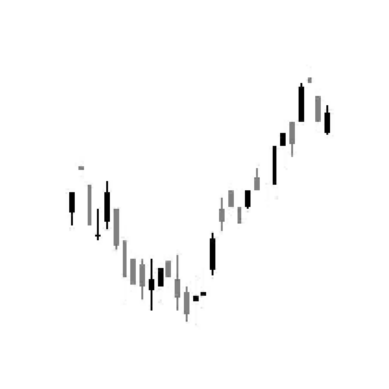

1/1 [==============================] - 0s 37ms/step
Uptrend


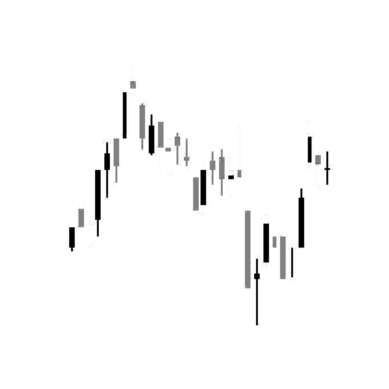

1/1 [==============================] - 0s 32ms/step
Sideways


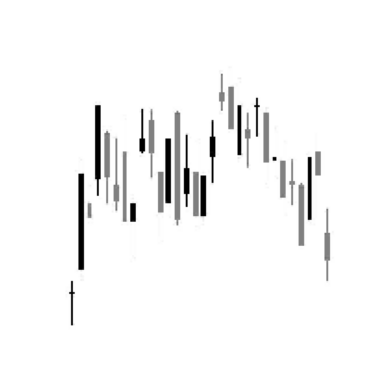

1/1 [==============================] - 0s 38ms/step
Sideways


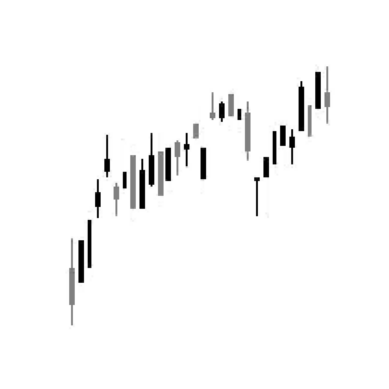

1/1 [==============================] - 0s 39ms/step
Uptrend


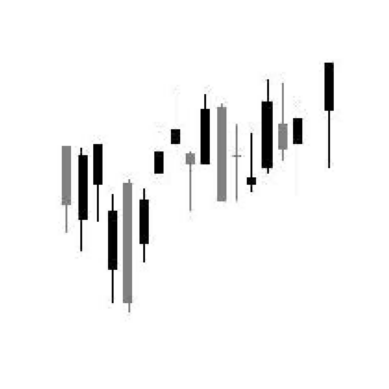

1/1 [==============================] - 0s 36ms/step
Uptrend


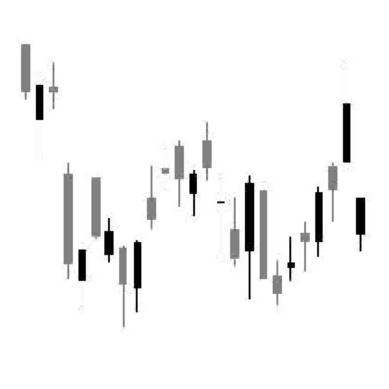

1/1 [==============================] - 0s 36ms/step
Sideways


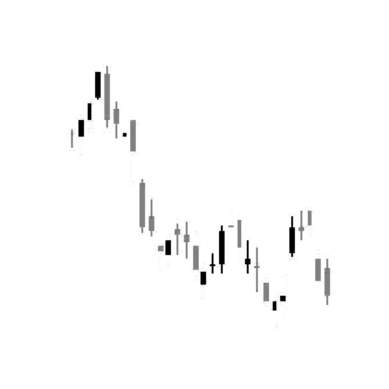

1/1 [==============================] - 0s 44ms/step
Downtrend


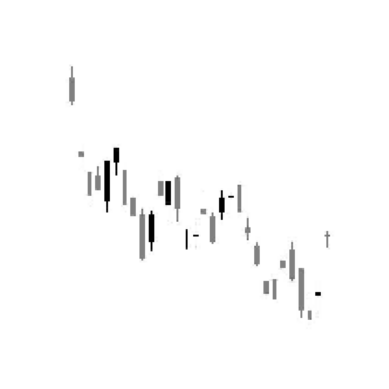

1/1 [==============================] - 0s 37ms/step
Sideways


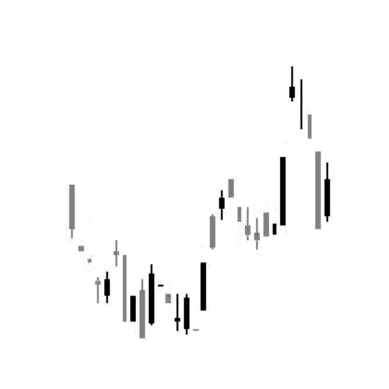

1/1 [==============================] - 0s 34ms/step
Uptrend


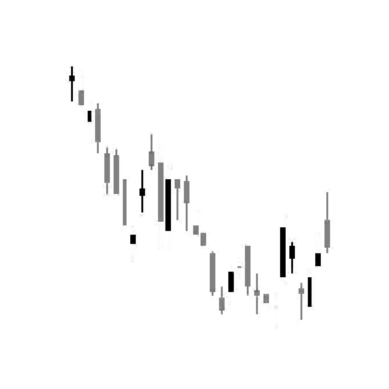

1/1 [==============================] - 0s 33ms/step
Downtrend


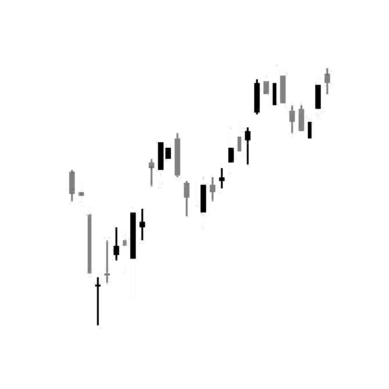

1/1 [==============================] - 0s 39ms/step
Uptrend


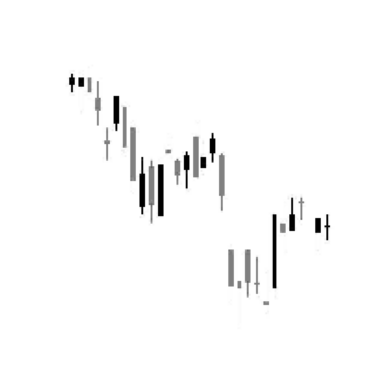

1/1 [==============================] - 0s 40ms/step
Downtrend


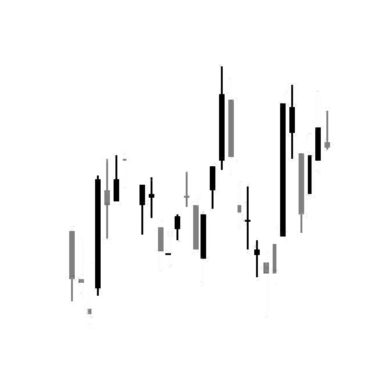

1/1 [==============================] - 0s 35ms/step
Sideways


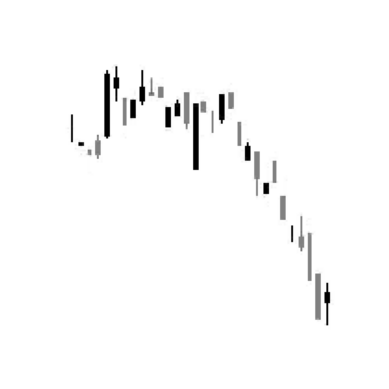

1/1 [==============================] - 0s 35ms/step
Downtrend


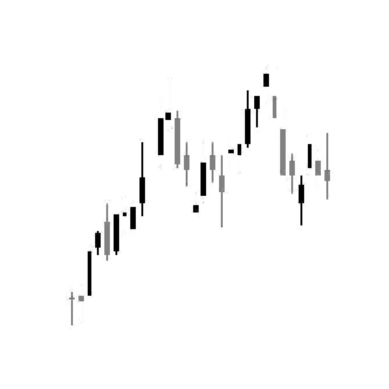

1/1 [==============================] - 0s 37ms/step
Sideways


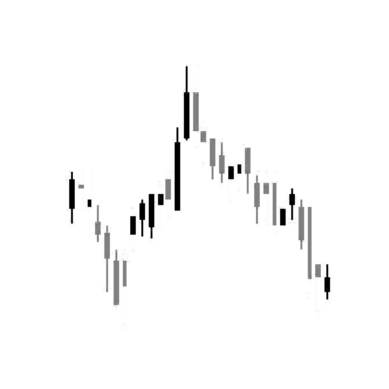

1/1 [==============================] - 0s 33ms/step
Sideways


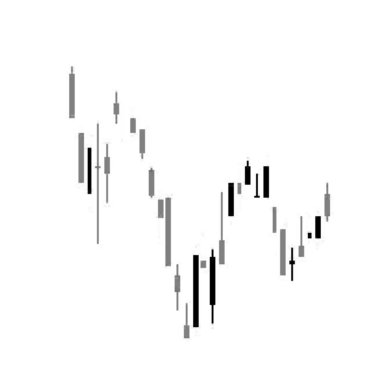

1/1 [==============================] - 0s 37ms/step
Sideways


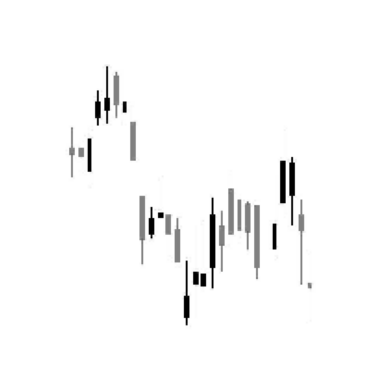

1/1 [==============================] - 0s 31ms/step
Sideways


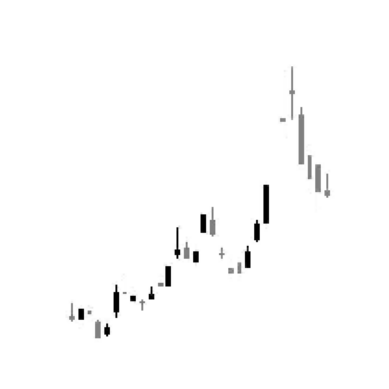

1/1 [==============================] - 0s 39ms/step
Uptrend


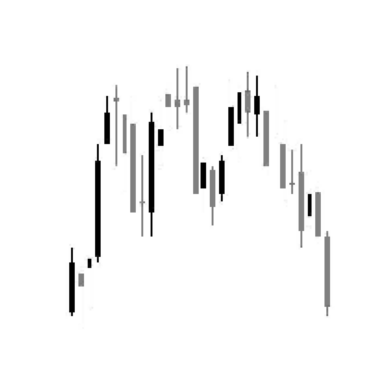

1/1 [==============================] - 0s 38ms/step
Sideways


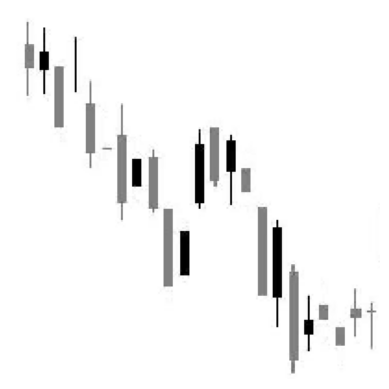

1/1 [==============================] - 0s 38ms/step
Downtrend


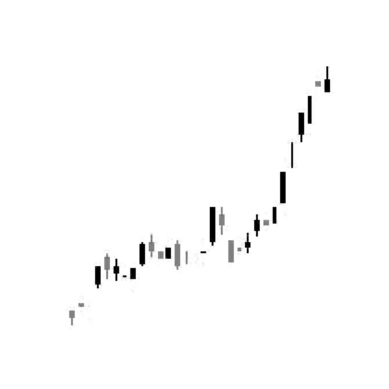

1/1 [==============================] - 0s 36ms/step
Uptrend


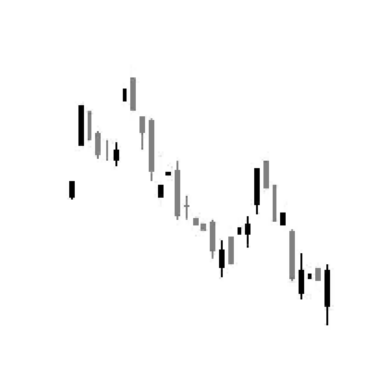

1/1 [==============================] - 0s 37ms/step
Downtrend


In [57]:
dir_path = 'test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i, target_size=(200, 200))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch size of 1
    img_array /= 255.0  # Normalize pixel values

    preds = model.predict(img_array)
    if preds[0][0] == preds.max():
        print('Downtrend')
    elif preds[0][1] == preds.max():
        print('Sideways')
    else:
        print('Uptrend')